# Mel Scale

The Mel scale was developed to approximate human perception of pitch, with reference to a standard (typically 1 kHz) frequency. There are several approximations of the Mel scale that have been proposed by various researchers, including Volkmann, Newmann, and others.

## Approximations of the Mel Scale

### Volkmann's Approximation

- **Proposal:** The Mel scale can be represented as a simple logarithmic transformation of frequency.
- **Details:** This approach suggests a straightforward relationship between frequency and perceived pitch, emphasizing the logarithmic nature of human hearing.

### Newmann's Approximation

- **Proposal:** A more detailed, piecewise linear approximation of the Mel scale.
- **Details:** Newmann's method offers a finer approximation by segmenting the frequency range into linear parts, aiming to more closely mimic the ear's response.

### O'Shaughnessy's Approximation

- **Used by:** librosa and most modern audio processing applications.
- **Formula:** A piecewise linear function in the Mel scale domain.
- **Significance:** Considered to be a good approximation of the human ear's response, O'Shaughnessy's formula is widely accepted and utilized in audio processing today.

## Conclusion

The Mel scale is crucial for understanding human perception of pitch, and the various approximations offer insight into how this perception can be modeled mathematically. O'Shaughnessy's approximation, in particular, provides a basis for many contemporary audio processing applications.


O'Shaughnessy's approximation to the Mel scale can be represented by the following formula:

$$
\text{{Mel}}(f) = 2595 \cdot \log_{10}(1 + \frac{f}{700})
$$

where:

- $\text{{Mel}}(f)$ is the perceived pitch in Mel scale
- $f$ is the frequency in Hz


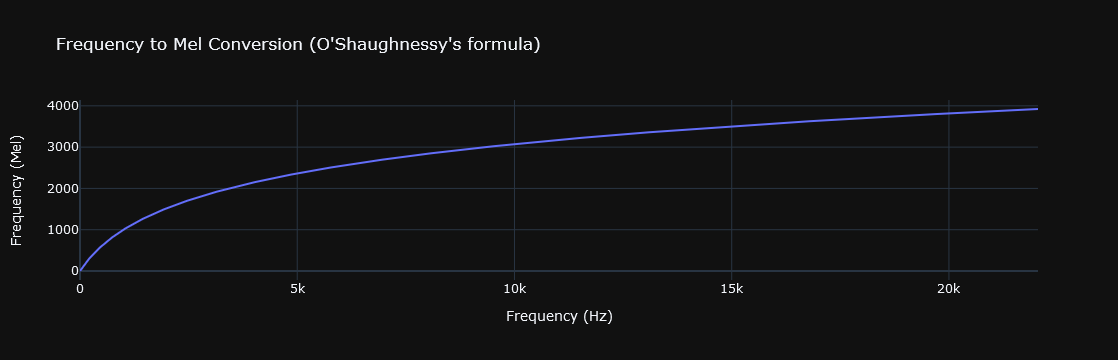

In [5]:
import numpy as np
import plotly.graph_objects as go

# Define frequency range in Hz
frequencies_hz = np.linspace(0, 22050, 1000)  # adjust as needed

# Convert to Mel scale (O'Shaughnessy's formula)
frequencies_mel = 2595 * np.log10(1 + frequencies_hz / 700)

# Create a figure
fig = go.Figure()

# Add Hz to Mel conversion line
fig.add_trace(
    go.Scatter(x=frequencies_hz, y=frequencies_mel, mode='lines', name='Hz to Mel (O\'Shaughnessy\'s formula)')
)

# Customize layout
fig.update_layout(
    title='Frequency to Mel Conversion (O\'Shaughnessy\'s formula)',
    xaxis_title='Frequency (Hz)',
    yaxis_title='Frequency (Mel)',
    template='plotly_dark'
)

# Show plot
fig.show()


# Mel Frequency Cepstral Coefficients (MFCC) Filterbank

The Mel Frequency Cepstral Coefficients (MFCC) technique is a widely used method in the field of speech and audio processing. It plays a pivotal role in feature extraction for automatic speech recognition, speaker identification, and music information retrieval tasks. The core idea behind MFCCs is to mimic the human ear's behavior, particularly its logarithmic perception of frequency components, rather than a linear approach.

## Core Concepts of MFCC

- **Human Ear Mimicry:** Acknowledges that humans perceive frequency components in a logarithmic fashion.
- **Feature Extraction:** Utilizes the spectral properties of an audio signal for various audio processing tasks.

## Steps in MFCC Process

1. **Fourier Transform:** The initial step involves converting the time-domain audio signal into the frequency domain using the Fourier transform.
2. **Mel Filterbank Application:** The spectrum obtained from the Fourier transform is then passed through a series of filters, known as a Mel filterbank, to extract the frequencies perceived by the human ear.
3. **Logarithmic Scaling:** The energies of the signals passing through the Mel filters are scaled logarithmically to mimic the human ear's response.
4. **Discrete Cosine Transform (DCT):** The logarithmically scaled filterbank energies are then processed through a Discrete Cosine Transform to obtain the final set of cepstral coefficients.
5. **Extraction of Cepstral Coefficients:** The coefficients obtained from the DCT represent the Mel Frequency Cepstral Coefficients, capturing the signal's spectral properties.

## Significance of MFCC

The MFCC technique is instrumental in capturing the essence of an audio signal's spectral properties, making it indispensable for accurate feature extraction in speech and audio processing applications. By mimicking the human ear's logarithmic perception, MFCCs provide a more natural and efficient means of analyzing audio signals for various tasks.



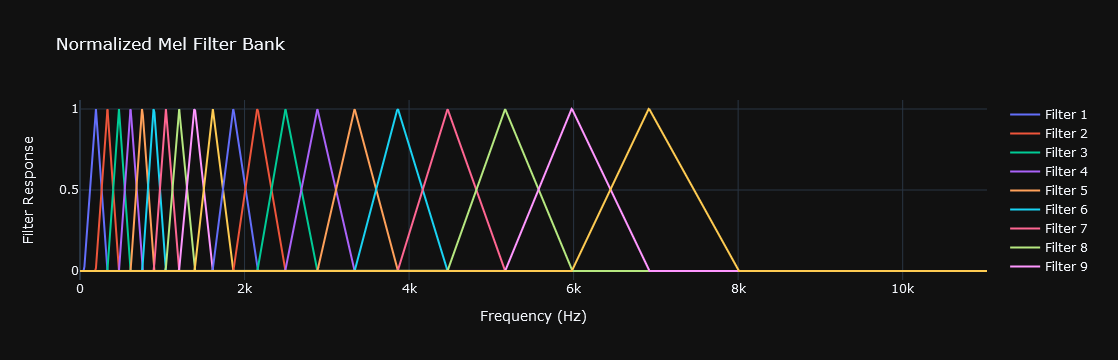

In [6]:
import numpy as np
import librosa
import plotly.graph_objects as go

# Define parameters
num_filters = 20
sample_rate = 22050
n_fft = 2048  # number of FFT components
min_freq = 50  # min frequency considered
max_freq = 8000  # max frequency considered (could be sample_rate/2)

# Create Mel filters
mel_filters = librosa.filters.mel(sr=sample_rate, n_fft=n_fft, n_mels=num_filters, fmin=min_freq, fmax=max_freq)

# Normalize each filter to have a peak of 1.0
mel_filters = mel_filters / mel_filters.max(axis=1, keepdims=True)

# Calculate the frequency points
fft_freqs = np.linspace(0, sample_rate // 2, np.ceil((n_fft + 1) / 2).astype(int))

# Create Plotly figure
fig = go.Figure()

# Add Mel filter banks to the figure
for i in range(num_filters):
    fig.add_trace(
        go.Scatter(x=fft_freqs, y=mel_filters[i], mode='lines', name=f'Filter {i+1}')
    )

# Customize layout
fig.update_layout(
    title='Normalized Mel Filter Bank',
    xaxis_title='Frequency (Hz)',
    yaxis_title='Filter Response',
    template='plotly_dark'
)

# Show plot
fig.show()
